In [14]:
from google.colab import files
upload = files.upload()

Saving train_combined.csv to train_combined.csv


In [15]:
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
color = sns.color_palette()
%matplotlib inline

eng_stopwords = set(stopwords.words("english"))
pd.options.mode.chained_assignment = None

train_df = pd.read_csv(io.BytesIO(upload['train_combined.csv']))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train_df.head()

,author,id,text
0,EAP,id26305,"This process, however, afforded me no means of..."
1,HPL,id17569,It never once occurred to me that the fumbling...
2,EAP,id11008,"In his left hand was a gold snuff box, from wh..."
3,MWS,id27763,How lovely is spring As we looked from Windsor...
4,HPL,id12958,"Finding nothing else, not even gold, the Super..."


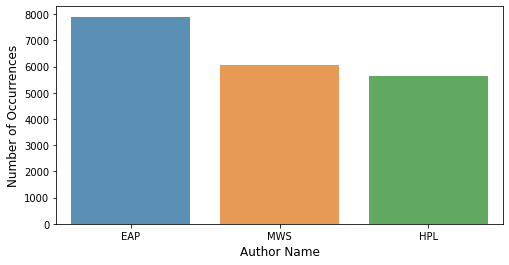

In [17]:
cnt_srs = train_df['author'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

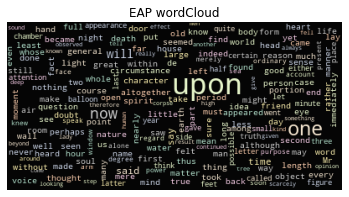

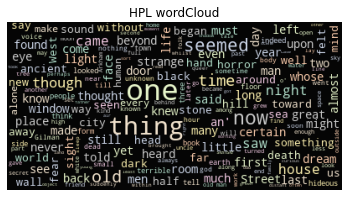

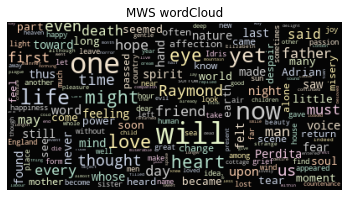

In [18]:
from matplotlib import pyplot

/eap_documents = train_df[train_df.author == 'EAP']['text'].values
hpl_documents = train_df[train_df.author == 'HPL']['text'].values
mws_documents = train_df[train_df.author == 'MWS']['text'].values

eap_words = " ".join(eap_documents)
hpl_words = " ".join(hpl_documents)
mws_words = " ".join(mws_documents)

from wordcloud import WordCloud, STOPWORDS


wordcloud = WordCloud(relative_scaling = 1.0, stopwords = STOPWORDS, max_font_size= 35)
wordcloud.generate(eap_words)
plt.title('EAP wordCloud')
pyplot.imshow(wordcloud.recolor(colormap= 'Pastel2' , random_state=17), alpha=0.98)
pyplot.axis('off')
pyplot.show()

wordcloud = WordCloud(relative_scaling = 1.0, stopwords = STOPWORDS, max_font_size= 35)
wordcloud.generate(hpl_words)
plt.title('HPL wordCloud')
pyplot.imshow(wordcloud.recolor(colormap= 'Pastel2' , random_state=17), alpha=0.98)
pyplot.axis('off')
pyplot.show()

wordcloud = WordCloud(relative_scaling = 1.0, stopwords = STOPWORDS, max_font_size= 35)
wordcloud.generate(mws_words)
plt.title('MWS wordCloud')
pyplot.imshow(wordcloud.recolor(colormap= 'Pastel2' , random_state=17), alpha=0.98)
pyplot.axis('off')
pyplot.show()

In [0]:
## Number of words in the text ##
train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
#test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["text"].apply(lambda x: len(set(str(x).split())))
#test_df["num_unique_words"] = test_df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["text"].apply(lambda x: len(str(x)))
#test_df["num_chars"] = test_df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_df["num_stopwords"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#test_df["num_stopwords"] = test_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

train_df["article"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in ('a','an','the')]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#test_df["num_punctuations"] =test_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
train_df["num_words_upper"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#test_df["num_words_upper"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train_df["num_words_title"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#test_df["num_words_title"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


#apply(lambda x: len([c for c in train_df["text"] if c in string.punctuation])
      
#train_df["NOUN"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))


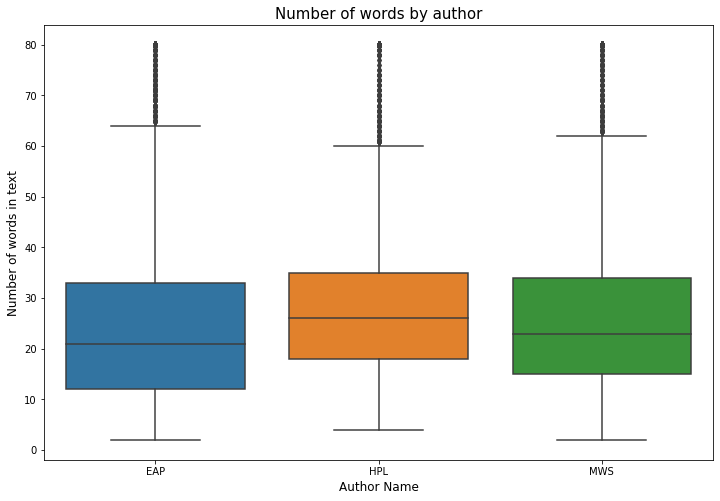

In [20]:
train_df['num_words'].loc[train_df['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='num_words', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of words in text', fontsize=12)
plt.title("Number of words by author", fontsize=15)
plt.show()

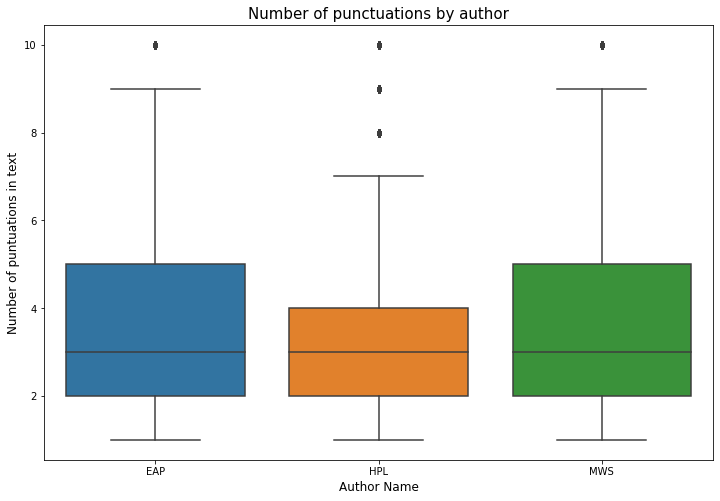

In [21]:
train_df['num_punctuations'].loc[train_df['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='num_punctuations', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', fontsize=12)
plt.title("Number of punctuations by author", fontsize=15)
plt.show()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
41904


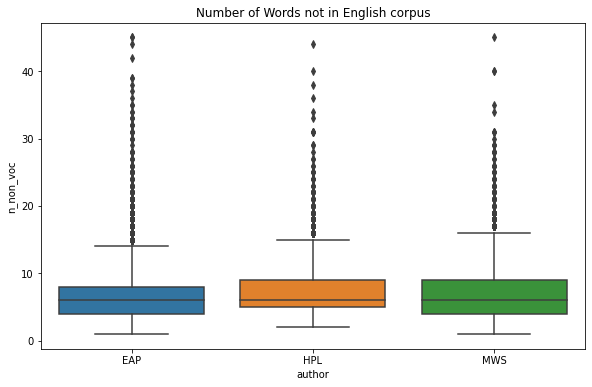

In [22]:
#set of english words
nltk.download('words')
fig_sizes = {'S' : (6.5,4),
             'M' : (9.75,6),
             'L' : (13,8)}
def show_plot(f_size=fig_sizes['M'],plot_title="",x_title="",y_title=""):
    plt.figure(figsize=f_size)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(plot_title)
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
#set of words that do not appear in the nltk engluish vocabulary
not_in_vocab = set(train_df.loc[:,'text'].str.split(expand=True).unstack()).difference(english_vocab)
print(len(not_in_vocab))
list(not_in_vocab)[:15]

train_df["n_non_voc"] = train_df['text'].str.split().apply(lambda x:len(set(x).intersection(not_in_vocab)))
ax_box = show_plot(fig_sizes['M'],'Number of Words not in English corpus','Author','Number of Words not in English corpus')
sns.boxplot(x=train_df.loc[train_df.n_non_voc<50,'author'], y=train_df.loc[train_df.n_non_voc<50,'n_non_voc'],ax=ax_box)

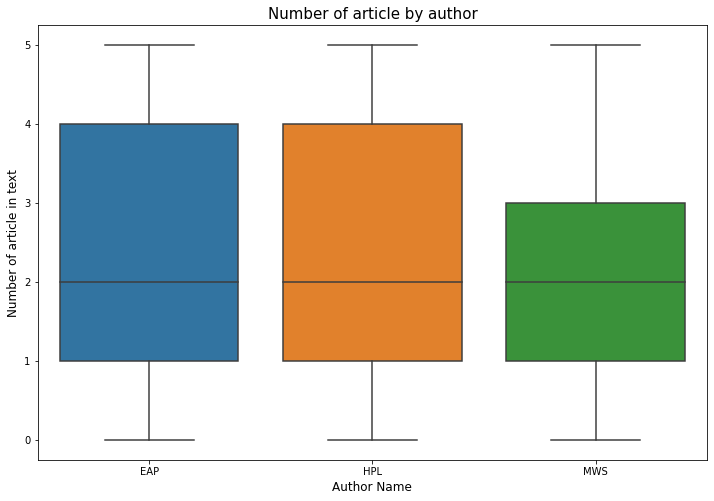

In [24]:
train_df['article'].loc[train_df['article']>25] = 25 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='article', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of article in text', fontsize=12)
plt.title("Number of article by author", fontsize=15)
plt.show()

In [26]:
import spacy.cli 
spacy.cli.download("en_core_web_lg")

# Load the large English NLP model
nlp = spacy.load('en_core_web_lg')


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
def extract_nouns(text):
    """Extract a few types of nouns, and beginning, middle and end idx using spaCy's POS (part of speech) tagger. 
    Keyword arguments:
    text -- the actual text source from which to extract entities
    """
    keep_pos = ['PROPN', 'NOUN']
    return [(tok.text) for tok in nlp(text) if tok.pos_ in keep_pos]

In [0]:
  def add_nouns(train_df):
    train_df['nouns'] = train_df['text'].apply(extract_nouns)


In [29]:
add_nouns(train_df)

,author,id,text,num_words,num_unique_words,num_chars,num_stopwords,article,num_punctuations,num_words_upper,num_words_title,mean_word_len,n_non_voc,nouns
0,EAP,id26305,"This process, however, afforded me no means of...",41,35,231,19,4,7,2,3,4.658537,14,"[process, means, dimensions, dungeon, circuit,..."
1,HPL,id17569,It never once occurred to me that the fumbling...,14,14,71,8,2,1,0,1,4.142857,3,"[fumbling, mistake]"
2,EAP,id11008,"In his left hand was a gold snuff box, from wh...",36,32,200,16,4,5,0,1,4.583333,8,"[hand, snuff, box, hill, manner, steps, snuff,..."
3,MWS,id27763,How lovely is spring As we looked from Windsor...,34,32,206,13,1,4,0,4,5.088235,12,"[spring, Windsor, Terrace, counties, cottages,..."
4,HPL,id12958,"Finding nothing else, not even gold, the Super...",27,25,174,11,2,4,0,2,5.481481,8,"[gold, Superintendent, attempts, look, counten..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27966,NaN,id11749,All this is now the fitter for my purpose.,9,9,42,7,1,1,0,1,3.777778,2,"[fitter, purpose]"
27967,NaN,id10526,I fixed myself on a wide solitude.,7,7,34,4,1,1,1,1,4.000000,2,[solitude]
27968,NaN,id13477,It is easily understood that what might improv...,25,24,150,11,3,2,0,1,5.040000,5,"[detail, time, effect]"
27969,NaN,id13761,"Be this as it may, I now began to feel the ins...",38,34,197,21,3,3,2,3,4.210526,8,"[inspiration, hope, length, thoughts, resolution]"


In [0]:
def extract_named_ents(text):
    return [(ent.text) for ent in nlp(text).ents]

def add_named_ents(train_df):
    train_df['named_ents'] = train_df['text'].apply(extract_named_ents)   

In [0]:
add_named_ents(train_df)


In [0]:
def extract_verb(text):
    """Extract a few types of nouns, and beginning, middle and end idx using spaCy's POS (part of speech) tagger. 
    Keyword arguments:
    text -- the actual text source from which to extract entities
    """
    keep_pos = ['VERB']
    return [(tok.text) for tok in nlp(text) if tok.pos_ in keep_pos]

In [0]:
  def add_verb(train_df):
    train_df['verb'] = train_df['text'].apply(extract_verb)


In [0]:
add_verb(train_df)


In [0]:
def extract_pos(text):
    return [(tok.text,tok.pos_) for tok in nlp(text) ]

def add_all(train_df):
    train_df['all_pos'] = train_df['text'].apply(extract_pos)

In [0]:
add_all(train_df)

,id,text,author,nouns,named_ents,verb,all_pos
0,id26305,"This process, however, afforded me no means of...",EAP,"[process, means, dimensions, dungeon, circuit,...",[],"[afforded, ascertaining, might, make, return, ...","[(This, DET), (process, NOUN), (,, PUNCT), (ho..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[fumbling, mistake]",[],"[occurred, might]","[(It, PRON), (never, ADV), (once, ADV), (occur..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[hand, snuff, box, hill, manner, steps, snuff,...",[],"[capered, cutting, took]","[(In, ADP), (his, DET), (left, ADJ), (hand, NO..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[spring, Windsor, Terrace, counties, cottages,...","[Windsor Terrace, sixteen, former years]","[looked, spread, speckled, looked, cheering]","[(How, ADV), (lovely, ADJ), (is, AUX), (spring..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[gold, Superintendent, attempts, look, counten...",[],"[Finding, abandoned, steals, sits, thinking]","[(Finding, VERB), (nothing, PRON), (else, ADV)..."
...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[landscape, painter, brush]",[],"[could, fancied, looked, built]","[(I, PRON), (could, VERB), (have, AUX), (fanci..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"[lids, spasm]",[],[clenched],"[(The, DET), (lids, NOUN), (clenched, VERB), (..."
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, agir, Frenchman]","[Mais il faut agir, Frenchman]","[say, faints]","[(Mais, PROPN), (il, X), (faut, X), (agir, PRO..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[item, news]",[],"[strikes, received]","[(For, ADP), (an, DET), (item, NOUN), (of, ADP..."


In [0]:
train_df['noun_tokens'] = [len(token) for token in train_df.nouns]
train_df['entity_tokens'] = [len(token) for token in train_df.named_ents]
train_df['verb_tokens'] = [len(token) for token in train_df.verb]



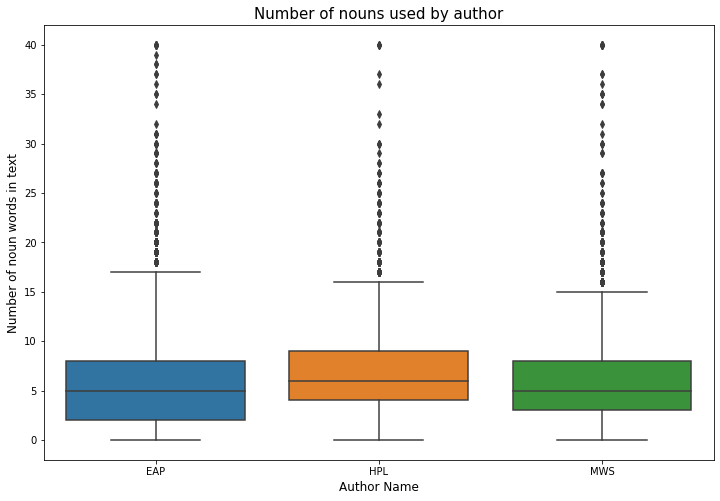

In [38]:
train_df['noun_tokens'].loc[train_df['noun_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='noun_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of noun words in text', fontsize=12)
plt.title("Number of nouns used by author", fontsize=15)
plt.show()

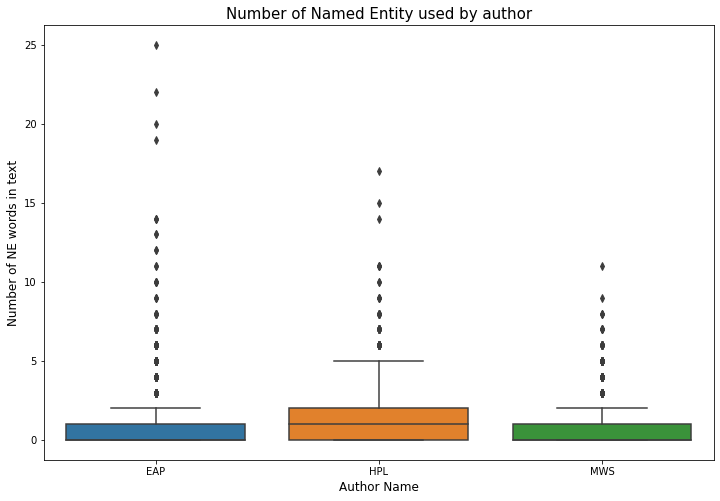

In [39]:
train_df['entity_tokens'].loc[train_df['entity_tokens']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='entity_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of NE words in text', fontsize=12)
plt.title("Number of Named Entity used by author", fontsize=15)
plt.show()

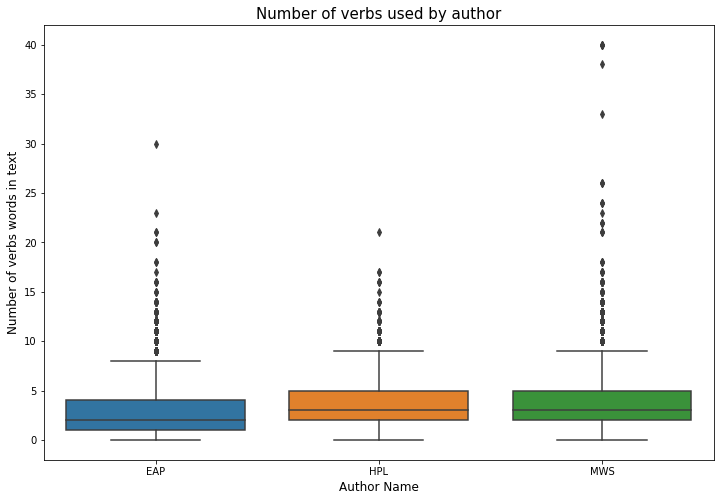

In [40]:
train_df['verb_tokens'].loc[train_df['verb_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='verb_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of verbs words in text', fontsize=12)
plt.title("Number of verbs used by author", fontsize=15)
plt.show()

In [0]:
def extract_adj(text):
  keep_pos=['ADJ']
  return [(tok.text) for tok in nlp(text) if tok.pos_ in keep_pos ]

def add_adj(train_df):
    train_df['adj'] = train_df['text'].apply(extract_adj)

In [0]:
add_adj(train_df)

In [0]:
train_df['adj_tokens'] = [len(token) for token in train_df.adj]

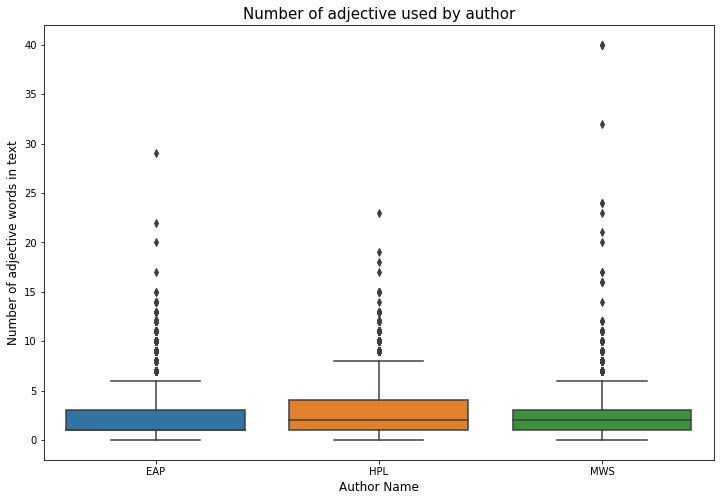

In [44]:
train_df['adj_tokens'].loc[train_df['adj_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='adj_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of adjective words in text', fontsize=12)
plt.title("Number of adjective used by author", fontsize=15)
plt.show()

In [0]:
def extract_conj(text):
    keep_pos=['CONJ','CCONJ']
    return [(tok.text) for tok in nlp(text) if tok.pos_ in keep_pos ]

def add_conj(train_df):
    train_df['conj'] = train_df['text'].apply(extract_conj)


In [0]:
add_conj(train_df)

In [0]:
train_df['conj_tokens'] = [len(token) for token in train_df.conj]

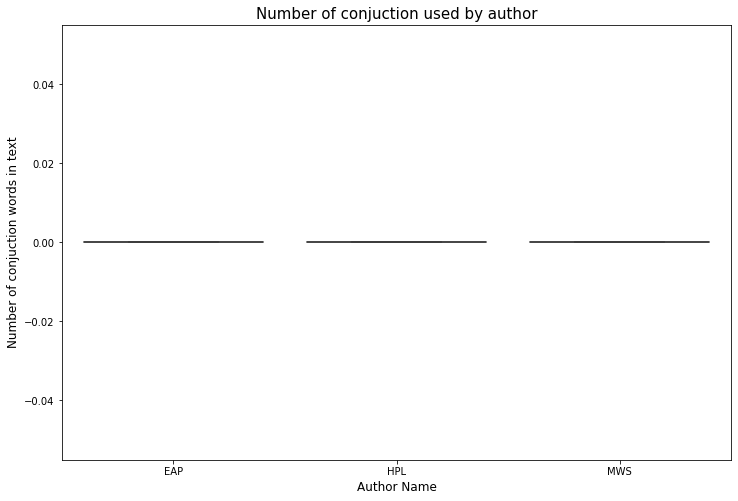

In [58]:
train_df['conj_tokens'].loc[train_df['conj_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='conj_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of conjuction words in text', fontsize=12)
plt.title("Number of conjuction used by author", fontsize=15)
plt.show()

In [0]:
def extract_noun_phrases(text):
    return [(tok.text) for tok in nlp(text).noun_chunks ]

def add_noun_phrases(train_df):
    train_df['noun_phrases'] = train_df['text'].apply(extract_noun_phrases)

In [0]:
add_noun_phrases(train_df)

In [0]:
train_df['noun_phrases_tokens'] = [len(token) for token in train_df.noun_phrases]

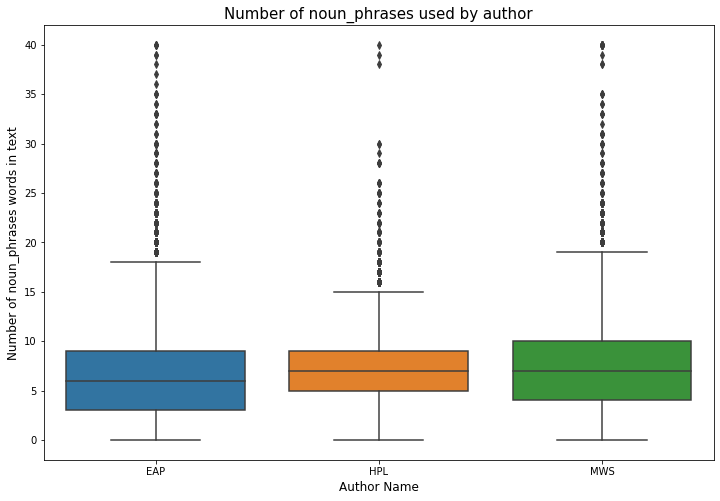

In [54]:
train_df['noun_phrases_tokens'].loc[train_df['noun_phrases_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='noun_phrases_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of noun_phrases words in text', fontsize=12)
plt.title("Number of noun_phrases used by author", fontsize=15)
plt.show()

In [59]:
train_df.head()

,author,id,text,num_words,num_unique_words,num_chars,num_stopwords,article,num_punctuations,num_words_upper,num_words_title,mean_word_len,n_non_voc,nouns,named_ents,verb,noun_tokens,entity_tokens,verb_tokens,adj,adj_tokens,conj,conj_tokens,noun_phrases,noun_phrases_tokens
0,EAP,id26305,"This process, however, afforded me no means of...",41,35,231,19,4,7,2,3,4.658537,14,"[process, means, dimensions, dungeon, circuit,...",[],"[afforded, ascertaining, might, make, return, ...",8,0,7,"[aware, uniform]",2,[],0,"[This process, me, no means, the dimensions, m...",10
1,HPL,id17569,It never once occurred to me that the fumbling...,14,14,71,8,2,1,0,1,4.142857,3,"[fumbling, mistake]",[],"[occurred, might]",2,0,2,[mere],1,[],0,"[It, me, the fumbling, a mere mistake]",4
2,EAP,id11008,"In his left hand was a gold snuff box, from wh...",36,32,200,16,4,5,0,1,4.583333,8,"[hand, snuff, box, hill, manner, steps, snuff,...",[],"[capered, cutting, took]",10,0,3,"[left, gold, fantastic, greatest, possible]",5,[],0,"[his left hand, a gold snuff box, he, the hill...",10
3,MWS,id27763,How lovely is spring As we looked from Windsor...,34,32,206,13,1,4,0,4,5.088235,12,"[spring, Windsor, Terrace, counties, cottages,...","[Windsor Terrace, sixteen, former years]","[looked, spread, speckled, looked, cheering]",8,3,5,"[lovely, fertile, happy, wealthier, former, fair]",6,[],0,"[spring, we, Windsor Terrace, the sixteen fert...",7
4,HPL,id12958,"Finding nothing else, not even gold, the Super...",27,25,174,11,2,4,0,2,5.481481,8,"[gold, Superintendent, attempts, look, counten...",[],"[Finding, abandoned, steals, sits, thinking]",6,0,5,[perplexed],1,[],0,"[nothing, not even gold, the Superintendent, h...",8


In [0]:
from google.colab import files
train_df.to_csv('final_features.csv') 
files.download('final_features.csv')